In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the dataset

In [2]:
x_train = pd.read_csv('/content/drive/MyDrive/Project/US Adidas Sales/Dataset/x_train_unit_clean.csv')
x_test = pd.read_csv('/content/drive/MyDrive/Project/US Adidas Sales/Dataset/x_test_unit_clean.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Project/US Adidas Sales/Dataset/y_train_unit_sold.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Project/US Adidas Sales/Dataset/y_test_unit_sold.csv')

In [3]:
y_test1 = y_test["Units Sold"]
y_train1 = y_train["Units Sold"]

In [4]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Month                       5842 non-null   int64  
 1   Day                         5842 non-null   int64  
 2   Gender                      5842 non-null   int64  
 3   Price per Unit              5842 non-null   float64
 4   Retailer_Amazon             5842 non-null   int64  
 5   Retailer_Foot Locker        5842 non-null   int64  
 6   Retailer_Kohl's             5842 non-null   int64  
 7   Retailer_Sports Direct      5842 non-null   int64  
 8   Retailer_West Gear          5842 non-null   int64  
 9   Region_Midwest              5842 non-null   int64  
 10  Region_Northeast            5842 non-null   int64  
 11  Region_South                5842 non-null   int64  
 12  Region_Southeast            5842 non-null   int64  
 13  Region_West                 5842 

In [5]:
y_train1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5842 entries, 0 to 5841
Series name: Units Sold
Non-Null Count  Dtype
--------------  -----
5842 non-null   int64
dtypes: int64(1)
memory usage: 45.8 KB


In [6]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504 entries, 0 to 2503
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Month                       2504 non-null   int64  
 1   Day                         2504 non-null   int64  
 2   Gender                      2504 non-null   int64  
 3   Price per Unit              2504 non-null   float64
 4   Retailer_Amazon             2504 non-null   int64  
 5   Retailer_Foot Locker        2504 non-null   int64  
 6   Retailer_Kohl's             2504 non-null   int64  
 7   Retailer_Sports Direct      2504 non-null   int64  
 8   Retailer_West Gear          2504 non-null   int64  
 9   Region_Midwest              2504 non-null   int64  
 10  Region_Northeast            2504 non-null   int64  
 11  Region_South                2504 non-null   int64  
 12  Region_Southeast            2504 non-null   int64  
 13  Region_West                 2504 

In [7]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504 entries, 0 to 2503
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Units Sold  2504 non-null   int64
dtypes: int64(1)
memory usage: 19.7 KB


In [8]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import shap

In [11]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import optuna

In [13]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Getter function for adjusted R-squared

In [14]:
def adj_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - n_features - 1)
    return adj_r2

1) Random Forest Baseline

In [40]:
print("--------RF--------")
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# create and fit the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train, y_train1)

# predict on the test set
y_pred = rf_reg.predict(x_test)

# evaluate the model using mean squared error
mse = mean_squared_error(y_test1, y_pred)
rmse = mean_squared_error(y_test1, y_pred,squared = False)

# calculate adjusted R^2
adj_r2 = adj_r2_score(y_test, y_pred, x_test.shape[1])
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print('Adjusted R^2:', adj_r2)

--------RF--------
Mean Squared Error: 10264.818557836265
Root Mean Squared Error: 101.31544086582393
Adjusted R^2: 0.7430422452776977


In [16]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Month                       5842 non-null   int64  
 1   Day                         5842 non-null   int64  
 2   Gender                      5842 non-null   int64  
 3   Price per Unit              5842 non-null   float64
 4   Retailer_Amazon             5842 non-null   int64  
 5   Retailer_Foot Locker        5842 non-null   int64  
 6   Retailer_Kohl's             5842 non-null   int64  
 7   Retailer_Sports Direct      5842 non-null   int64  
 8   Retailer_West Gear          5842 non-null   int64  
 9   Region_Midwest              5842 non-null   int64  
 10  Region_Northeast            5842 non-null   int64  
 11  Region_South                5842 non-null   int64  
 12  Region_Southeast            5842 non-null   int64  
 13  Region_West                 5842 

In [17]:
y_train1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5842 entries, 0 to 5841
Series name: Units Sold
Non-Null Count  Dtype
--------------  -----
5842 non-null   int64
dtypes: int64(1)
memory usage: 45.8 KB


Feature Importance for the Random Forest

                     Feature  Importance
3             Price per Unit    0.278857
14     Sales Method_In-store    0.087279
1                        Day    0.072624
10          Region_Northeast    0.065648
0                      Month    0.061580
2                     Gender    0.053037
19  Product_ Street Footwear    0.044009
49      State_South Carolina    0.032455
24          State_California    0.030688
15       Sales Method_Online    0.029944


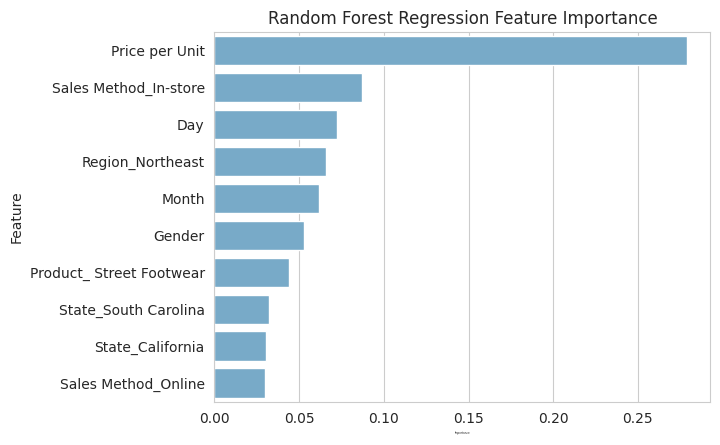

In [18]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = rf_reg.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('Random Forest Regression Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()

Shaply plot for the Random Forest

Permutation explainer: 201it [01:34,  2.00it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


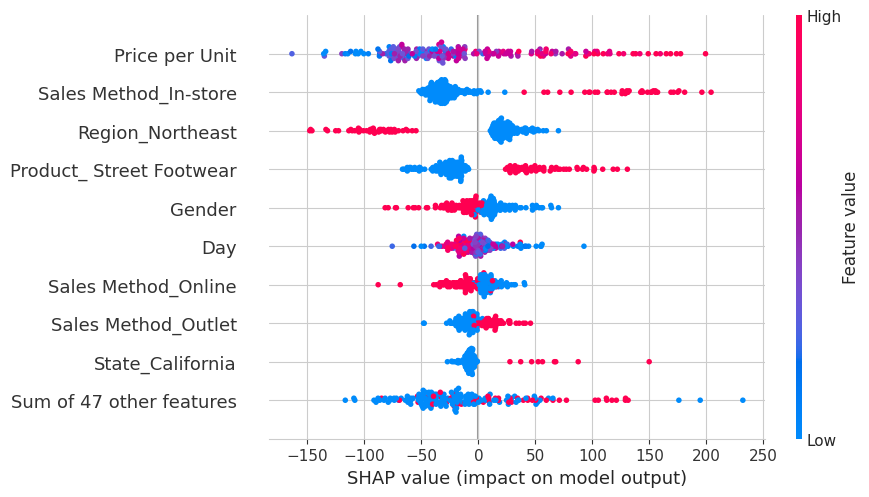

In [19]:
# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test.shape[0], size=200, replace=False)
x_test_sample = x_test.iloc[sample_indices]

explainer = shap.Explainer(rf_reg.predict, x_test_sample)

sv = explainer(x_test_sample)
shap.plots.beeswarm(sv)

2) LGBM

In [20]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Month                       5842 non-null   int64  
 1   Day                         5842 non-null   int64  
 2   Gender                      5842 non-null   int64  
 3   Price per Unit              5842 non-null   float64
 4   Retailer_Amazon             5842 non-null   int64  
 5   Retailer_Foot Locker        5842 non-null   int64  
 6   Retailer_Kohl's             5842 non-null   int64  
 7   Retailer_Sports Direct      5842 non-null   int64  
 8   Retailer_West Gear          5842 non-null   int64  
 9   Region_Midwest              5842 non-null   int64  
 10  Region_Northeast            5842 non-null   int64  
 11  Region_South                5842 non-null   int64  
 12  Region_Southeast            5842 non-null   int64  
 13  Region_West                 5842 

In [41]:
print("--------LGBM--------")
import lightgbm as lgb
# Create a LightGBM regressor
lgb_regressor = lgb.LGBMRegressor(random_state = 42)
cat_features_index = [i for i in range(len(x_train.columns)) if i not in [3] and x_train.dtypes[i] == 'int64']
# Train the regressor
lgb_regressor.fit(x_train, y_train,categorical_feature=cat_features_index)

# Make predictions on the test data
y_pred1 = lgb_regressor.predict(x_test)

# Calculate the RMSE
mse = mean_squared_error(y_test1, y_pred1)
rmse = mean_squared_error(y_test1, y_pred1,squared = False)
# calculate adjusted R^2
adj_r2 = adj_r2_score(y_test1, y_pred1, x_test.shape[1])

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print('Adjusted R^2:', adj_r2)

--------LGBM--------


Using categorical_feature in Dataset.


Mean Squared Error: 8134.322503565242
Root Mean Squared Error: 90.19047900729457
Adjusted R^2: 0.796374652418229


Feature Importance for LGBM

                     Feature  Importance
3             Price per Unit        1018
1                        Day         244
15       Sales Method_Online         231
0                      Month         192
14     Sales Method_In-store         104
2                     Gender          98
10          Region_Northeast          91
19  Product_ Street Footwear          87
12          Region_Southeast          82
17          Product_ Apparel          72


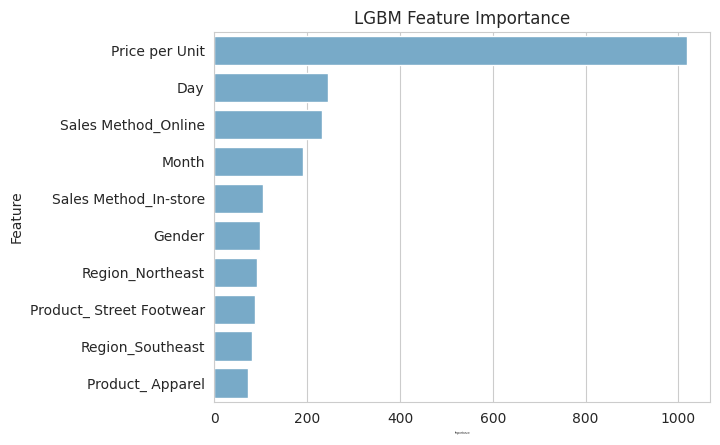

In [22]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = lgb_regressor.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('LGBM Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()

Shaply Plot for LGBM

Permutation explainer: 201it [00:29,  4.52it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


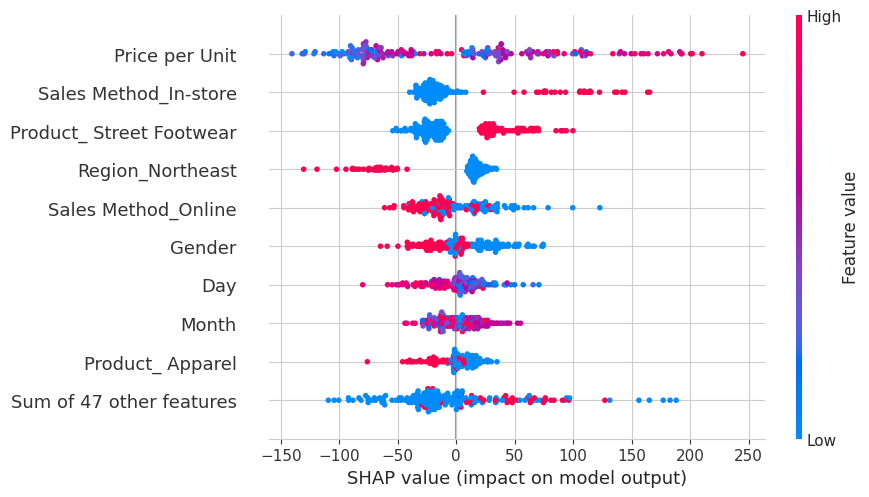

In [23]:
# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test.shape[0], size=200, replace=False)
x_test_sample = x_test.iloc[sample_indices]

explainer = shap.Explainer(lgb_regressor.predict, x_test_sample)

sv = explainer(x_test_sample)
shap.plots.beeswarm(sv)

3) XGBOOST

In [36]:
import xgboost as xgb
print("--------XGBoost--------")
# Instantiate an XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state = 42)

# Train the model on the training data
xgb_reg.fit(x_train, y_train)

# Predict the target values for the test data
y_pred2 = xgb_reg.predict(x_test)

# Calculate the RMSE
mse = mean_squared_error(y_test1, y_pred2)
rmse = mean_squared_error(y_test1, y_pred2,squared = False)
# calculate adjusted R^2
adj_r2 = adj_r2_score(y_test1, y_pred2, x_test.shape[1])

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print('Adjusted R^2:', adj_r2)

--------XGBoost--------
Mean Squared Error: 7193.504646174575
Root Mean Squared Error: 84.81453086691322
Adjusted R^2: 0.8199260131047945


Feature Importance for XGBoost

                   Feature  Importance
24        State_California    0.087867
49    State_South Carolina    0.077601
10        Region_Northeast    0.070161
14   Sales Method_In-store    0.065876
42          State_New York    0.065159
45              State_Ohio    0.042185
7   Retailer_Sports Direct    0.039307
9           Region_Midwest    0.038242
43    State_North Carolina    0.036610
55           State_Wyoming    0.036298


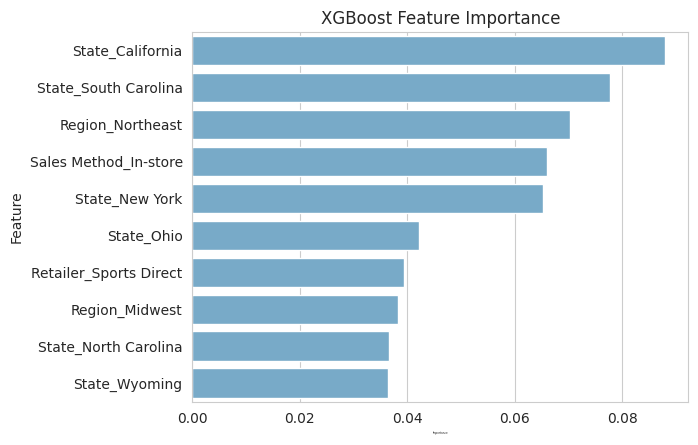

In [25]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = xgb_reg.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()

Shaply plot for XGBoost

Permutation explainer: 201it [00:22,  4.95it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


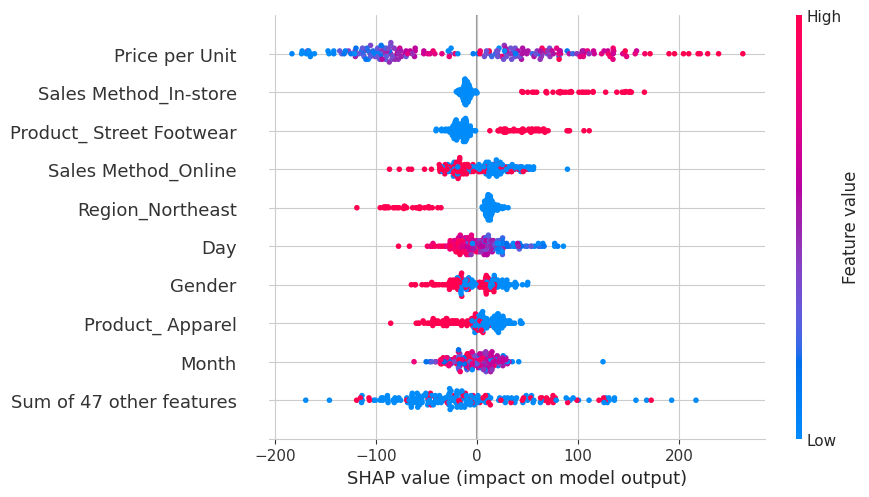

In [26]:
# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test.shape[0], size=200, replace=False)
x_test_sample = x_test.iloc[sample_indices]

explainer = shap.Explainer(xgb_reg.predict, x_test_sample)

sv = explainer(x_test_sample)
shap.plots.beeswarm(sv)

4) Elastic Net

In [37]:
from sklearn.linear_model import ElasticNet
print("--------Elastic Net--------")

# Fit an Elastic Net regression model on the training data
enet = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)
enet.fit(x_train, y_train1)

# Make predictions on the test set
y_pred3 = enet.predict(x_test)

# Calculate the RMSE
mse = mean_squared_error(y_test1, y_pred3)
rmse = mean_squared_error(y_test1, y_pred3,squared = False)
# calculate adjusted R^2
adj_r2 = adj_r2_score(y_test1, y_pred3, x_test.shape[1])

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print('Adjusted R^2:', adj_r2)

--------Elastic Net--------
Mean Squared Error: 28863.7780317911
Root Mean Squared Error: 169.89343139683504
Adjusted R^2: 0.2774571168440265


The results are quite bad, we will use some form of tuning to get the best results.

In [28]:
# Define the objective function
def objective(trial):

    # Define the hyperparameters to tune
    alpha = trial.suggest_float('alpha', 1e-5, 1e2, log=True)
    l1_ratio = trial.suggest_float('l1_ratio', 0, 1)

    # Initialize the Elastic Net model with the hyperparameters
    en = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)

    # Fit the model on the training data
    en.fit(x_train, y_train)

    # Predict on the validation data
    y_pred = en.predict(x_test)

    # Calculate the mean squared error and adjusted R-squared on the validation data
    mse = mean_squared_error(y_test, y_pred)
    
    # Return the evaluation metrics to optimize
    return mse
# Define the study object and optimize the objective function
study = optuna.create_study(direction='minimize', study_name = 'regression')
study.optimize(objective, n_trials=1000)

# Print the best hyperparameters and evaluation metrics
print('Best Hyperparameters:', study.best_params)


[I 2023-05-11 16:59:31,389] A new study created in memory with name: regression
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.393e+07, tolerance: 2.265e+04
[I 2023-05-11 16:59:31,794] Trial 0 finished with value: 21124.976810863092 and parameters: {'alpha': 0.0005003850921520549, 'l1_ratio': 0.4302792358257074}. Best is trial 0 with value: 21124.976810863092.
[I 2023-05-11 16:59:31,821] Trial 1 finished with value: 37631.853230065506 and parameters: {'alpha': 33.6228320359259, 'l1_ratio': 0.6149333948875885}. Best is trial 0 with value: 21124.976810863092.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.505e+07, tolerance: 2.265e+04
[I 2023-05-11 16:59:32,324] Trial 2 finished with value: 21126.834019017664 and parameters: {'alpha': 8.766450346767534

Best Hyperparameters: {'alpha': 0.0002025592535211933, 'l1_ratio': 0.028849143061164702}


In [38]:
# Fit an Elastic Net regression model on the training data
enet = ElasticNet(alpha=0.0002025592535211933,
                  l1_ratio=0.028849143061164702,
                  random_state=42)
enet.fit(x_train, y_train1)

# Make predictions on the test set
y_pred3 = enet.predict(x_test)

# Calculate the RMSE
mse = mean_squared_error(y_test1, y_pred3)
rmse = mean_squared_error(y_test1, y_pred3,squared = False)
# calculate adjusted R^2
adj_r2 = adj_r2_score(y_test1, y_pred3, x_test.shape[1])

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print('Adjusted R^2:', adj_r2)

Mean Squared Error: 21124.36397817039
Root Mean Squared Error: 145.3422305394079
Adjusted R^2: 0.47119677691492134


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.872e+07, tolerance: 2.265e+04


5) Catboost

In [39]:
from catboost import CatBoostRegressor
print("--------CatBoost--------")

# Initialize the CatBoostRegressor model
cat_reg = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6,
                            random_seed=42, loss_function='RMSE')

# Fit the model on the training data
cat_reg.fit(x_train, y_train1, verbose = False)

# Predict on the validation data
y_pred4 = cat_reg.predict(x_test)

# Calculate the RMSE
mse = mean_squared_error(y_test1, y_pred4)

rmse = mean_squared_error(y_test1, y_pred4, squared = False)
# calculate adjusted R^2
adj_r2 = adj_r2_score(y_test1, y_pred4, x_test.shape[1])

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print('Adjusted R^2:', adj_r2)

--------CatBoost--------
Mean Squared Error: 6656.843824869398
Root Mean Squared Error: 81.58948354334275
Adjusted R^2: 0.8333601677284758


Feature importance for CatBoost

                     Feature  Importance
3             Price per Unit   30.108961
14     Sales Method_In-store    9.628804
15       Sales Method_Online    8.160243
10          Region_Northeast    6.089811
1                        Day    5.587662
19  Product_ Street Footwear    4.741342
2                     Gender    4.218926
0                      Month    3.628949
16       Sales Method_Outlet    3.167394
11              Region_South    2.925155


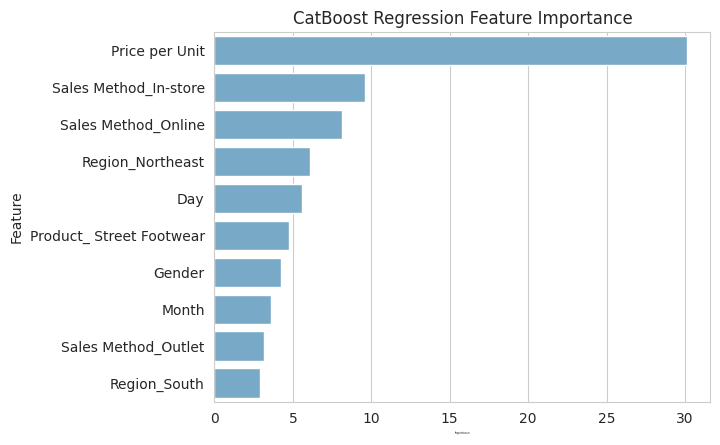

In [31]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = cat_reg.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('CatBoost Regression Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()

Shaply Plot

Permutation explainer: 201it [00:14,  4.82it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


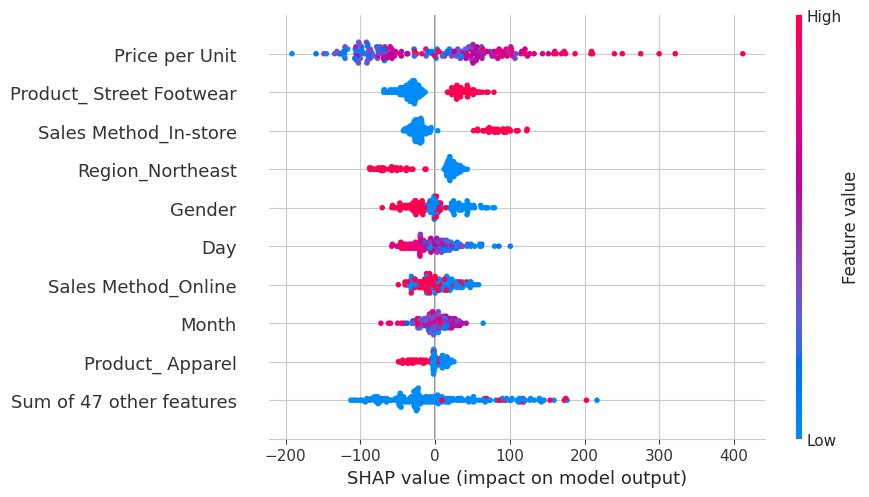

In [32]:
# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test.shape[0], size=200, replace=False)
x_test_sample = x_test.iloc[sample_indices]

explainer = shap.Explainer(cat_reg.predict, x_test_sample)

sv = explainer(x_test_sample)
shap.plots.beeswarm(sv)